<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/7week/CNN_MNIST_cursive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

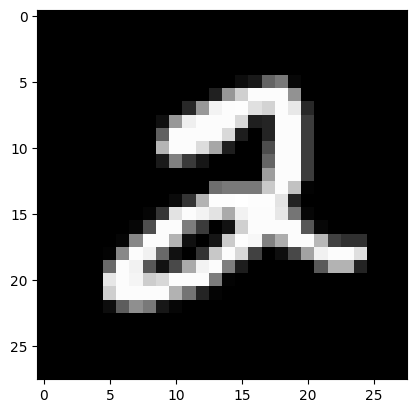

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 로드
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[5], cmap='gray')
plt.show()



In [15]:
# 2. 데이터 전처리

# reshape
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# 원-핫 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [16]:
# 3. CNN 모델 구성
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 4. 컴파일
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
# 5. 학습
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8453 - loss: 0.5045 - val_accuracy: 0.9747 - val_loss: 0.0802
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9792 - loss: 0.0634 - val_accuracy: 0.9825 - val_loss: 0.0592
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9874 - loss: 0.0415 - val_accuracy: 0.9872 - val_loss: 0.0448
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0292 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9877 - val_loss: 0.0418
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 0.9804 - val_loss: 0.0657
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accuracy: 0.9894 - val_loss: 0.0387
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9961 - loss: 0.0131 - val_accuracy: 0.

In [19]:
# 6. 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.9908 - loss: 0.0320

Test accuracy: 0.9908000230789185


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


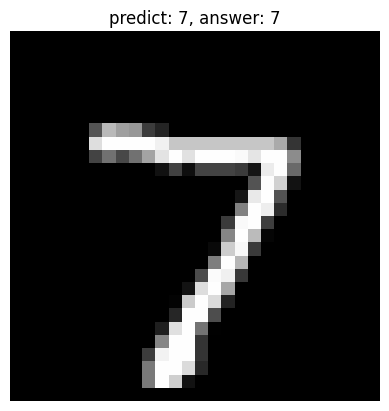

In [29]:
# 7. 예측 및 시각화
sample = test_images[0:1]  # 고정된 shape: (1, 28, 28, 1)
pred_probs = model.predict(sample)
pred_class = np.argmax(pred_probs[0])
true_class = np.argmax(test_labels[0])

plt.imshow(sample[0].reshape(28, 28), cmap='gray')
plt.title(f"predict: {pred_class}, answer: {true_class}")
plt.axis('off')
plt.show()